<a href="https://colab.research.google.com/github/Beval-Digital/LecturerMatcher/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Winson Napoleon - 2231028
* Eric Valention - 2231029
* Andrian - 2231030
* Ricky Roy Nardson - 2231032
* julianto - 2231050
* Hernando - 2231060

# Import library

In [52]:
import pandas as pd
import numpy as np
import warnings

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from joblib import dump
warnings.filterwarnings("ignore", category=FutureWarning)

# Data reading

In [53]:
data_krs = pd.read_csv('Dosen - Krs Mahasiswa.csv')
data_krs.head()

,npm_mahasiswa,jenis_semester,tahun_semester,kode_kelas,kode_matkul,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,total_terlaksana,total_tidak_hadir,kode_nilai,kategori
0,1931001,ganjil,2019,1BUMA,SI00194,Agama,2,0,0,0,0,A,Agama
1,1931001,ganjil,2019,1SIMA,SI00153,Arsitektur dan Organisasi Komputer,3,0,0,0,0,A,Computer Hardware
2,1931001,ganjil,2019,1VUMD,SI00192,Bahasa Inggris I,2,0,0,0,0,A,Bahasa
3,1931001,ganjil,2019,1SIMA,SIL0085,Lab. Teknik Pemograman,1,0,0,0,0,A,Basic Programming
4,1931001,ganjil,2019,1SIMA,SI00151,Pengantar Sistem Informasi,3,0,0,0,0,B,Manajemen


In [54]:
data_krs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   npm_mahasiswa      31991 non-null  int64 
 1   jenis_semester     31991 non-null  object
 2   tahun_semester     31991 non-null  int64 
 3   kode_kelas         31991 non-null  object
 4   kode_matkul        31991 non-null  object
 5   nama_matkul        31991 non-null  object
 6   sks_matakuliah     31991 non-null  int64 
 7   total_hadir        31991 non-null  int64 
 8   total_pertemuan    31991 non-null  int64 
 9   total_terlaksana   31991 non-null  int64 
 10  total_tidak_hadir  31991 non-null  int64 
 11  kode_nilai         29052 non-null  object
 12  kategori           31991 non-null  object
dtypes: int64(7), object(6)
memory usage: 3.2+ MB


In [55]:
data_penelitian = pd.read_csv('Dosen - Judul Penelitian.csv')
data_penelitian.head()

,nidn_dosen,judul_penelitian,kategori_utama,kategori_pendukung,tanggal_terbit,jenis_publikasi,tingkat_publikasi
0,1014118601,Studi Faktor Pendukung Popularitas Multiplayer...,Game Making,Marketing,29/06/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6
1,1021106601,INSTITUTIONAL WORK AND IMPLEMENTATION OF A PER...,NaN,NaN,08/07/2020,Scopus,Jurnal Ilmiah Internasional Terindeks Scopus Q...
2,1006017703,Konseptualisasi Peran Strategis dalam Pendidik...,NaN,NaN,23/11/2020,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...
3,1001068701,Busy board: Evidence from CEOs and director’s ...,NaN,NaN,27/01/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 1-2
4,1006017703,Analisis Perilaku Konsumen dan Keuangan Terhad...,NaN,NaN,28/11/2020,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...


In [56]:
data_penelitian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nidn_dosen          1825 non-null   object
 1   judul_penelitian    1827 non-null   object
 2   kategori_utama      220 non-null    object
 3   kategori_pendukung  221 non-null    object
 4   tanggal_terbit      1829 non-null   object
 5   jenis_publikasi     1795 non-null   object
 6   tingkat_publikasi   1829 non-null   object
dtypes: object(7)
memory usage: 100.1+ KB


In [57]:
data_mahasiswa = pd.read_csv('Dosen - Data Mahasiswa.csv')
data_mahasiswa.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028.0
1,1931001,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
2,1931009,Richie Marlon,Sistem Informasi,2019,3.90,Lulus,5120028.0
3,1931083,Elvin Whang,Sistem Informasi,2019,3.68,Lulus,6200076.0
4,2031001,Robin Sunjaya,Sistem Informasi,2020,3.88,Aktif,9180074.0


In [58]:
data_mahasiswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   npm_mahasiswa       673 non-null    int64  
 1   nama_mahasiswa      673 non-null    object 
 2   prodi_mahasiswa     673 non-null    object 
 3   angkatan_mahasiswa  673 non-null    int64  
 4   ipk_mahasiswa       670 non-null    float64
 5   status_mahasiswa    673 non-null    object 
 6   id_dosen            636 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 36.9+ KB


In [59]:
data_dosen = pd.read_csv('Dosen - Data Dosen.csv')
data_mahasiswa.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028.0
1,1931001,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
2,1931009,Richie Marlon,Sistem Informasi,2019,3.90,Lulus,5120028.0
3,1931083,Elvin Whang,Sistem Informasi,2019,3.68,Lulus,6200076.0
4,2031001,Robin Sunjaya,Sistem Informasi,2020,3.88,Aktif,9180074.0


In [60]:
data_mahasiswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   npm_mahasiswa       673 non-null    int64  
 1   nama_mahasiswa      673 non-null    object 
 2   prodi_mahasiswa     673 non-null    object 
 3   angkatan_mahasiswa  673 non-null    int64  
 4   ipk_mahasiswa       670 non-null    float64
 5   status_mahasiswa    673 non-null    object 
 6   id_dosen            636 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 36.9+ KB


In [61]:
print(data_krs.columns)
print(data_penelitian.columns)
print(data_mahasiswa.columns)
print(data_dosen.columns)

Index(['npm_mahasiswa', 'jenis_semester', 'tahun_semester', 'kode_kelas',
       'kode_matkul', 'nama_matkul', 'sks_matakuliah', 'total_hadir',
       'total_pertemuan', 'total_terlaksana', 'total_tidak_hadir',
       'kode_nilai', 'kategori'],
      dtype='object')
Index(['nidn_dosen', 'judul_penelitian', 'kategori_utama',
       'kategori_pendukung', 'tanggal_terbit', 'jenis_publikasi',
       'tingkat_publikasi'],
      dtype='object')
Index(['npm_mahasiswa', 'nama_mahasiswa', 'prodi_mahasiswa',
       'angkatan_mahasiswa', 'ipk_mahasiswa', 'status_mahasiswa', 'id_dosen'],
      dtype='object')
Index(['nidn_dosen', 'nama', 'id_dosen'], dtype='object')


# Data cleaning

In [62]:
def fill(df, column):
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)
    return df

data_penelitian = fill(data_penelitian, 'nidn_dosen')
data_dosen = fill(data_dosen, 'nidn_dosen')
data_mahasiswa = fill(data_mahasiswa, 'id_dosen')
data_krs = fill(data_krs, 'id_dosen')

In [63]:
merged_dosen = pd.merge(data_dosen, data_penelitian, on='nidn_dosen', how='left')

merged_dosen = merged_dosen.dropna()

merged_dosen.to_csv('merged_dosen.csv', index=False)

merged_dosen.head()

,nidn_dosen,nama,id_dosen,judul_penelitian,kategori_utama,kategori_pendukung,tanggal_terbit,jenis_publikasi,tingkat_publikasi
30,705087901,Heru Wijayanto Aripradono,2200046,Penerapan Komunikasi Digital Storytelling Pada...,Marketing,"Marketing, Multimedia",29/01/2018,Nasional non-sinta,Jurnal Nasional
31,705087901,Heru Wijayanto Aripradono,2200046,Social Media and the Journey of Volunteering,Marketing,Ethics,05/11/2020,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...
32,705087901,Heru Wijayanto Aripradono,2200046,Faktor Keputusan Pembelian Konsumen Online Mar...,Marketing,Manajemen,08/06/2020,International,Jurnal Internasional terindeks pada basis data...
33,705087901,Heru Wijayanto Aripradono,2200046,"ANALISIS PENGARUH KEMENARIKAN DESAIN WEBSITE, ...",Design,Marketing,26/12/2019,Nasional non-sinta,Jurnal Nasional
34,705087901,Heru Wijayanto Aripradono,2200046,Analisa Extended Technology Acceptance Model S...,Startup,Manajemen,01/12/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6


In [64]:
merged_dosen['kategori'] = merged_dosen['kategori_utama'].fillna('') + ', ' + merged_dosen['kategori_pendukung'].fillna('')

merged_dosen['kategori'] = merged_dosen['kategori'].str.replace(', ,', ',').str.strip(', ').str.replace(', $', '').str.replace('^, ', '')

merged_dosen['kategori'] = merged_dosen['kategori'].str.split(', ')

kategori_counts = merged_dosen.explode('kategori')

kategori_counts = kategori_counts[kategori_counts['kategori'].isin(['-', '']) == False]

kategori_counts_per_dosen = kategori_counts.groupby(['id_dosen', 'nama', 'kategori']).size().reset_index(name='count')

kategori_counts_per_dosen = kategori_counts_per_dosen.dropna()

print("Counts of Each Kategori for Each Dosen (Separated):")
print(kategori_counts_per_dosen)

Counts of Each Kategori for Each Dosen (Separated):
     id_dosen                  nama            kategori  count
0     1170002           Tony Wibowo              Design      6
1     1170002           Tony Wibowo              Ethics      2
2     1170002           Tony Wibowo         Game Making     14
3     1170002           Tony Wibowo    Logical Thinking      3
4     1170002           Tony Wibowo    Machine Learning      1
..        ...                   ...                 ...    ...
135  11200122  Diny Anggriani Adnas  Mobile Development      1
136  11200122  Diny Anggriani Adnas        Movie Making      2
137  11200122  Diny Anggriani Adnas          Multimedia     10
138  11200122  Diny Anggriani Adnas          Pemograman      1
139  11200122  Diny Anggriani Adnas      Website Making      2

[140 rows x 4 columns]


In [65]:
merged_mahasiswa = pd.merge(data_mahasiswa, data_krs, on='npm_mahasiswa', how='inner')

merged_mahasiswa = merged_mahasiswa.dropna()

merged_mahasiswa.to_csv('merged_mahasiswa.csv', index=False)

merged_mahasiswa.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen,jenis_semester,tahun_semester,kode_kelas,kode_matkul,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,total_terlaksana,total_tidak_hadir,kode_nilai,kategori
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SI00153,Arsitektur dan Organisasi Komputer,3,0,0,0,0,A,Computer Hardware
1,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SIL0085,Lab. Teknik Pemograman,1,0,0,0,0,A,Basic Programming
2,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SI00151,Pengantar Sistem Informasi,3,0,0,0,0,A,Manajemen
3,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SI00152,Teknik Pemograman,3,0,0,0,0,A,Basic Programming
4,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SIL0117,Lab. Desain Interaksi,1,0,0,0,0,A,Design


In [66]:
print(merged_mahasiswa.columns)
print(merged_dosen.columns)

Index(['npm_mahasiswa', 'nama_mahasiswa', 'prodi_mahasiswa',
       'angkatan_mahasiswa', 'ipk_mahasiswa', 'status_mahasiswa', 'id_dosen',
       'jenis_semester', 'tahun_semester', 'kode_kelas', 'kode_matkul',
       'nama_matkul', 'sks_matakuliah', 'total_hadir', 'total_pertemuan',
       'total_terlaksana', 'total_tidak_hadir', 'kode_nilai', 'kategori'],
      dtype='object')
Index(['nidn_dosen', 'nama', 'id_dosen', 'judul_penelitian', 'kategori_utama',
       'kategori_pendukung', 'tanggal_terbit', 'jenis_publikasi',
       'tingkat_publikasi', 'kategori'],
      dtype='object')


In [67]:
data = pd.read_csv('merged_mahasiswa.csv')

In [68]:
data_selected = data[['kode_matkul', 'nama_matkul', 'sks_matakuliah', 'total_hadir',
                      'total_pertemuan', 'kode_nilai', 'kategori', 'npm_mahasiswa']]

In [69]:
data_cleaned = data_selected[(data_selected['total_pertemuan'] > 0) &
                             (~data_selected['total_pertemuan'].isna())].copy()

data_cleaned.loc[:, 'rasio_kehadiran'] = data_cleaned['total_hadir'] / data_cleaned['total_pertemuan']

data_cleaned.count()

,0
kode_matkul,21799
nama_matkul,21799
sks_matakuliah,21799
total_hadir,21799
total_pertemuan,21799
kode_nilai,21799
kategori,21799
npm_mahasiswa,21799
rasio_kehadiran,21799


In [70]:
data_cleaned = data_cleaned.dropna()

print(f'Number of rows after dropping NaN values: {data_cleaned.shape[0]}')

print(data_cleaned.head())

Number of rows after dropping NaN values: 21799
   kode_matkul               nama_matkul  sks_matakuliah  total_hadir  \
29     SI00260           Bahasa Mandarin               3           14   
30     SI00268     Statistik Untuk Riset               3           14   
31     SI00163            Teknologi Game               3           14   
32     SI00233            Desain Kreatif               3           14   
33     SI00208  Teknik Pemasaran Digital               3           14   

    total_pertemuan kode_nilai     kategori  npm_mahasiswa  rasio_kehadiran  
29               14          B       Bahasa        1931173              1.0  
30               14          A  Tugas AKhir        1931173              1.0  
31               14          A  Game Making        1931173              1.0  
32               14          A       Design        1931173              1.0  
33               14          A    Marketing        1931173              1.0  


In [71]:
data_cleaned.count()

,0
kode_matkul,21799
nama_matkul,21799
sks_matakuliah,21799
total_hadir,21799
total_pertemuan,21799
kode_nilai,21799
kategori,21799
npm_mahasiswa,21799
rasio_kehadiran,21799


In [72]:
unique_nama_matkul = data_cleaned['nama_matkul'].unique()
print("\nDaftar Nama Mata Kuliah:")
for encoded_value in unique_nama_matkul:
    print(encoded_value)


Daftar Nama Mata Kuliah:
Bahasa Mandarin
Statistik Untuk Riset
Teknologi Game
Desain Kreatif
Teknik Pemasaran Digital
Fotografi Dan Desain Multimedia
Pengembangan Startup Business
Komunikasi Dan Etika Bisnis
Etika Profesi Sistem Informasi
Manajemen Proyek Sistem Informasi
Bahasa Indonesia
Metodologi Penelitian
Manajemen Dan Audit Sistem Informasi
Creative Writing
Efek Visual
Pengembangan Video Game
Hukum Siber
Seminar Sistem Informasi
Manajemen Layanan IT
Manajemen Dan Pengembangan Konten Digital
3D Model Dan Tekstur
Cross Cultural Understanding
Sinematografi
Sistem Basis Data
Pancasila
Sistem Operasi Dan Jaringan Komunikasi Data
Bahasa Inggris II
Perancangan Situs Web
Animasi 2D
Struktur Data
Pendidikan Kewarganegaraan
Pengembangan Kepribadian
Aplikasi Komputer Akuntansi
Kerangka Pengembangan Proyek
Manajemen Dan Proses Bisnis
Perintisan Startup Business
Matematika Sistem Informasi
Pemograman Basis Data
Pemograman Web
Wawasan Dan Aplikasi Teknologi
Bahasa Inggris I
3D Animasi
Lab 3D 

In [73]:
mata_kuliah_dihapus = [
    'Bahasa Mandarin', 'Statistik', 'Metodologi Penelitian Hukum Siber',
    'Seminar Sistem Informasi', 'Pancasila', 'Bahasa Inggris II',
    'Pendidikan Kewarganegaraan', 'Pengembangan Kepribadian',
    'Bahasa Inggris I', 'Agama', 'Bahasa dan Budaya Jepang',
    'Kerja Praktek', 'Bahasa dan Budaya Korea', 'Publikasi Artikel Ilmiah'
]

data_cleaned = data_cleaned[~data_cleaned['nama_matkul'].isin(mata_kuliah_dihapus)]
print(data_cleaned)

      kode_matkul                                     nama_matkul  \
30        SI00268                           Statistik Untuk Riset   
31        SI00163                                  Teknologi Game   
32        SI00233                                  Desain Kreatif   
33        SI00208                        Teknik Pemasaran Digital   
34        SI00225                 Fotografi Dan Desain Multimedia   
...           ...                                             ...   
29047     SI00208                        Teknik Pemasaran Digital   
29048     SIL0092              Lab. Pemograman Berorientasi Obyek   
29049     SIL0124                            Lab Machine Learning   
29050     SIL0137  Lab. Analisis Dan Perancangan Sistem Informasi   
29051     SI00212       Analisis Dan Perancangan Sistem Informasi   

       sks_matakuliah  total_hadir  total_pertemuan kode_nilai  \
30                  3           14               14          A   
31                  3           14     

# Data transformation

In [74]:
# Initialize the label encoder for 'kategori' column
label_encoder = LabelEncoder()
data_cleaned.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(data_cleaned['kategori'])

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# List of columns to encode
columns_to_encode = ['kode_matkul', 'kode_nilai', 'kategori', 'nama_matkul']

# Encode each specified column and save the LabelEncoder used for each one
for column in columns_to_encode:
    le = LabelEncoder()
    data_cleaned.loc[:, column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

In [75]:
print("Data types before cleaning:")
print(data_cleaned.dtypes)

numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

Data types before cleaning:
kode_matkul          object
nama_matkul          object
sks_matakuliah        int64
total_hadir           int64
total_pertemuan       int64
kode_nilai           object
kategori             object
npm_mahasiswa         int64
rasio_kehadiran     float64
kategori_encoded      int64
dtype: object


In [76]:
features = data_cleaned[['kode_matkul',
                        'rasio_kehadiran',
                        'kode_nilai',
                        'sks_matakuliah',
                        'kategori']]

In [77]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Model training

K-Means Elbow Method:


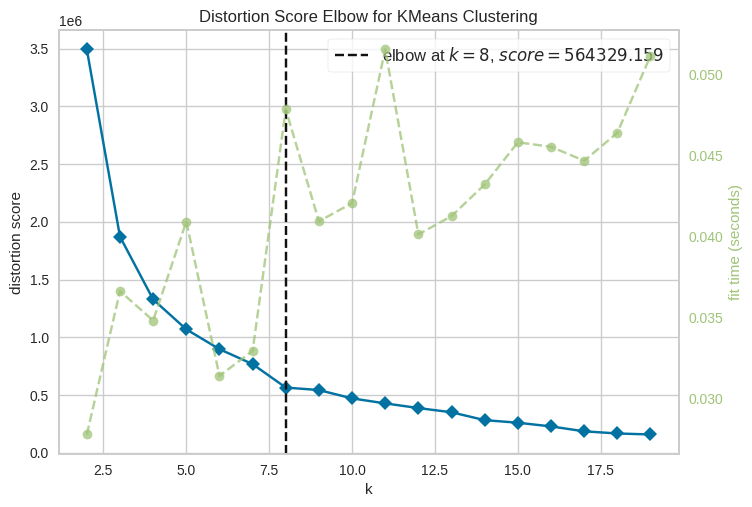

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
print("K-Means Elbow Method:")
elbow_kmeans = KElbowVisualizer(KMeans(random_state=42), k=(2,20))
elbow_kmeans.fit(features)
elbow_kmeans.show()

In [79]:
def dbscan_inertia(eps, min_samples, X):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    unique_labels = set(labels) - {-1}
    inertia = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


DBSCAN Elbow Method:


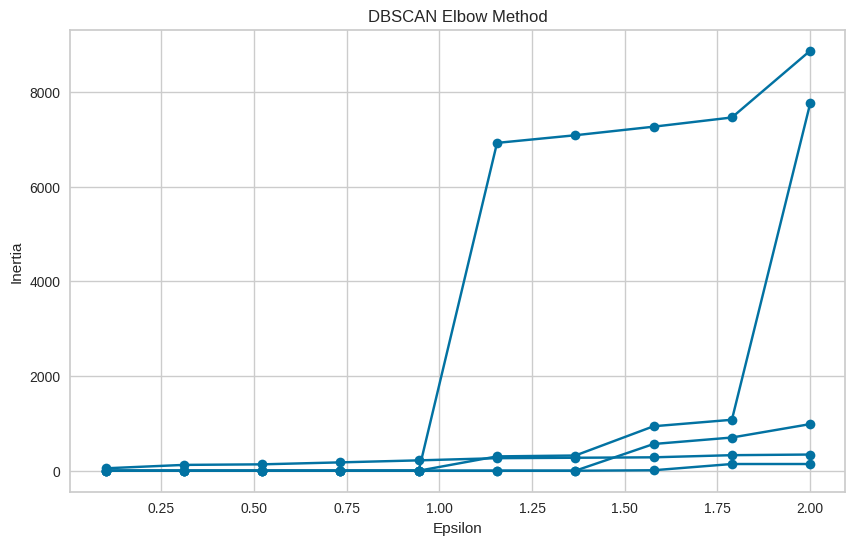

In [80]:
print("\nDBSCAN Elbow Method:")
eps_range = np.linspace(0.1, 2, 10)
inertias = []
for eps in eps_range:
    inertia = dbscan_inertia(eps, min_samples=15, X=features)
    inertias.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(eps_range, inertias, 'bo-')
plt.xlabel('Epsilon')
plt.ylabel('Inertia')
plt.title('DBSCAN Elbow Method')
plt.show()


Agglomerative Clustering Elbow Method:


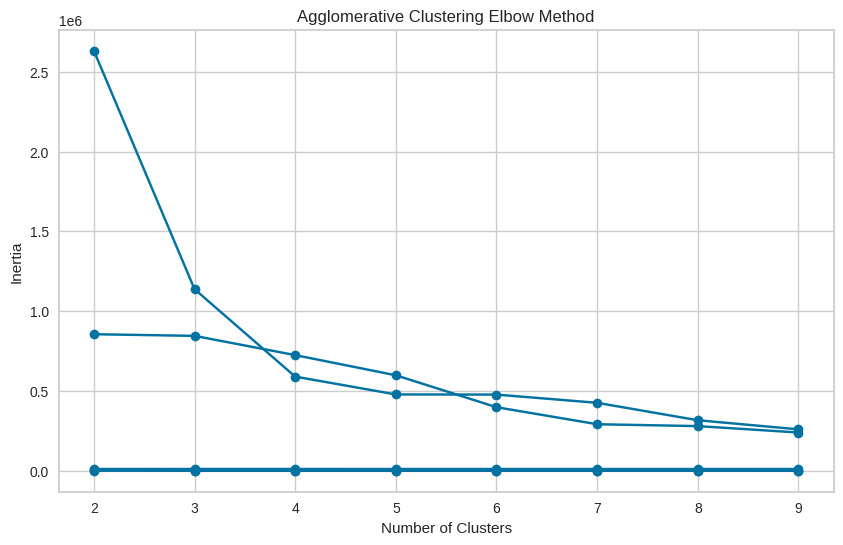

In [81]:
print("\nAgglomerative Clustering Elbow Method:")
inertias = []
k_range = range(2, 10)

for k in k_range:
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(features)

    inertia = 0
    for i in range(k):
        cluster_points = features[labels == i]
        centroid = cluster_points.mean(axis=0)
        inertia += np.sum((cluster_points - centroid) ** 2)
    inertias.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Agglomerative Clustering Elbow Method')
plt.show()


Gaussian Mixture Model Elbow Method:


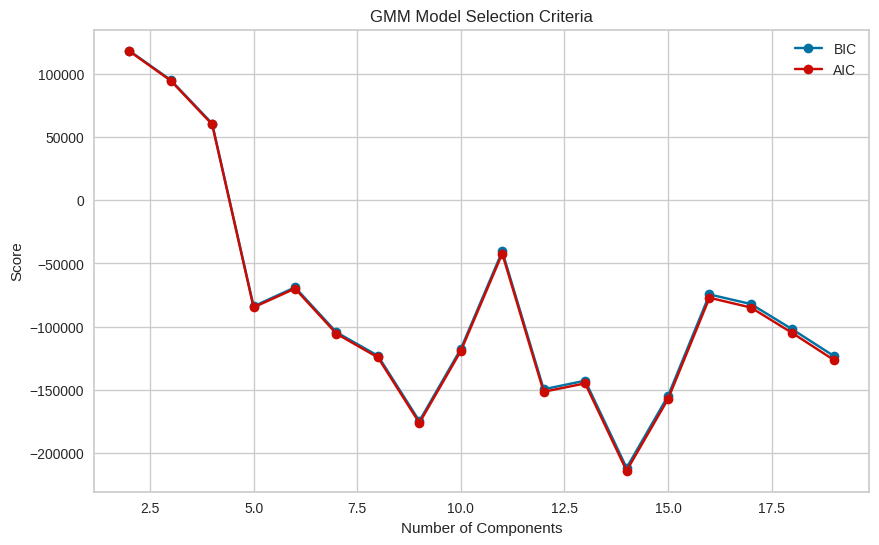

In [82]:
print("\nGaussian Mixture Model Elbow Method:")
bic = []
aic = []
k_range = range(2, 20)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(features)
    bic.append(gmm.bic(features))
    aic.append(gmm.aic(features))

plt.figure(figsize=(10, 6))
plt.plot(k_range, bic, 'bo-', label='BIC')
plt.plot(k_range, aic, 'ro-', label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('GMM Model Selection Criteria')
plt.legend()
plt.show()

In [83]:
kmeans = KMeans(n_clusters=15, random_state=42)
data_cleaned['cluster_kmeans'] = kmeans.fit_predict(features)

data_cleaned['cluster'] = kmeans.labels_

print(data_cleaned[['npm_mahasiswa', 'nama_matkul', 'rasio_kehadiran', 'cluster']])

       npm_mahasiswa nama_matkul  rasio_kehadiran  cluster
30           1931173          94         1.000000        4
31           1931173         100         1.000000        5
32           1931173          16         1.000000       10
33           1931173          97         1.000000        7
34           1931173          23         1.000000       10
...              ...         ...              ...      ...
29047        2231158          97         0.214286        7
29048        2231158          50         0.625000        3
29049        2231158          43         0.777778       12
29050        2231158          44         0.875000        3
29051        2231158           3         1.000000       13

[18235 rows x 4 columns]


In [84]:
dbscan = DBSCAN(eps=1.2, min_samples=15)
data_cleaned['cluster_dbscan'] = dbscan.fit_predict(features)

dbscan_labels = data_cleaned['cluster_dbscan']
print(data_cleaned[['npm_mahasiswa', 'nama_matkul', 'rasio_kehadiran', 'cluster_dbscan']])

       npm_mahasiswa nama_matkul  rasio_kehadiran  cluster_dbscan
30           1931173          94         1.000000               0
31           1931173         100         1.000000               1
32           1931173          16         1.000000               2
33           1931173          97         1.000000               3
34           1931173          23         1.000000               4
...              ...         ...              ...             ...
29047        2231158          97         0.214286               3
29048        2231158          50         0.625000              64
29049        2231158          43         0.777778              63
29050        2231158          44         0.875000              65
29051        2231158           3         1.000000              40

[18235 rows x 4 columns]


In [85]:
agglo = AgglomerativeClustering(n_clusters=15)
data_cleaned['cluster_agglo'] = agglo.fit_predict(features)

print(data_cleaned[['npm_mahasiswa', 'nama_matkul', 'rasio_kehadiran', 'cluster_agglo']])

       npm_mahasiswa nama_matkul  rasio_kehadiran  cluster_agglo
30           1931173          94         1.000000              7
31           1931173         100         1.000000              3
32           1931173          16         1.000000              2
33           1931173          97         1.000000             14
34           1931173          23         1.000000              2
...              ...         ...              ...            ...
29047        2231158          97         0.214286             14
29048        2231158          50         0.625000              4
29049        2231158          43         0.777778             12
29050        2231158          44         0.875000             10
29051        2231158           3         1.000000              2

[18235 rows x 4 columns]


In [86]:
gmm = GaussianMixture(n_components=15, random_state=42)
data_cleaned['cluster_gmm'] = gmm.fit_predict(features)

print(data_cleaned[['npm_mahasiswa', 'nama_matkul', 'rasio_kehadiran', 'cluster_gmm']])

       npm_mahasiswa nama_matkul  rasio_kehadiran  cluster_gmm
30           1931173          94         1.000000            4
31           1931173         100         1.000000            1
32           1931173          16         1.000000           10
33           1931173          97         1.000000            7
34           1931173          23         1.000000           10
...              ...         ...              ...          ...
29047        2231158          97         0.214286           14
29048        2231158          50         0.625000           12
29049        2231158          43         0.777778           12
29050        2231158          44         0.875000           12
29051        2231158           3         1.000000           13

[18235 rows x 4 columns]


# Model tune & evaluation

In [87]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_cleaned)

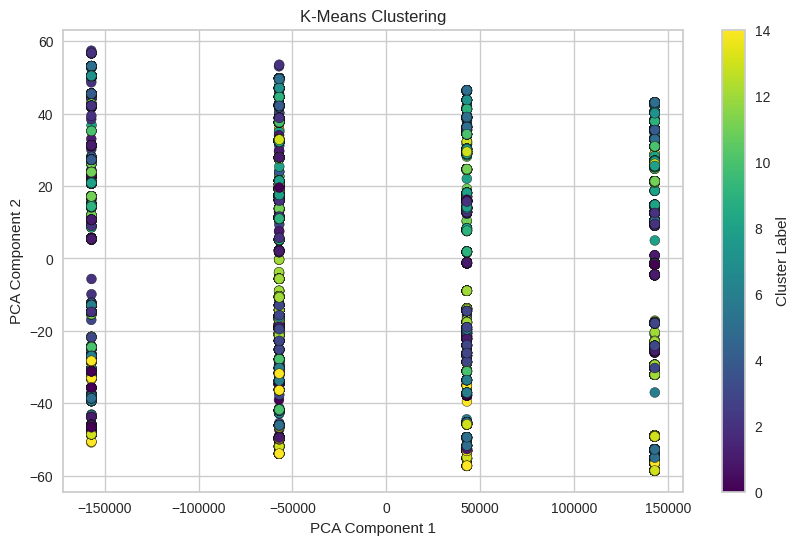

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_cleaned['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

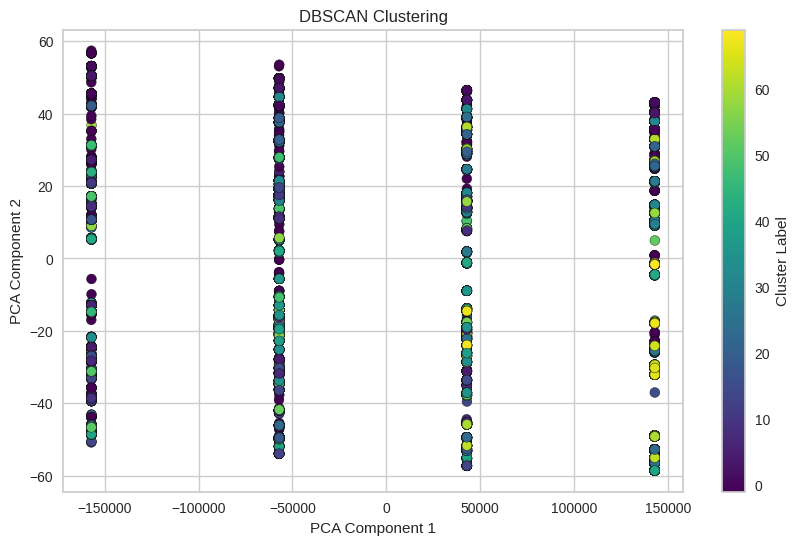

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_cleaned['cluster_dbscan'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

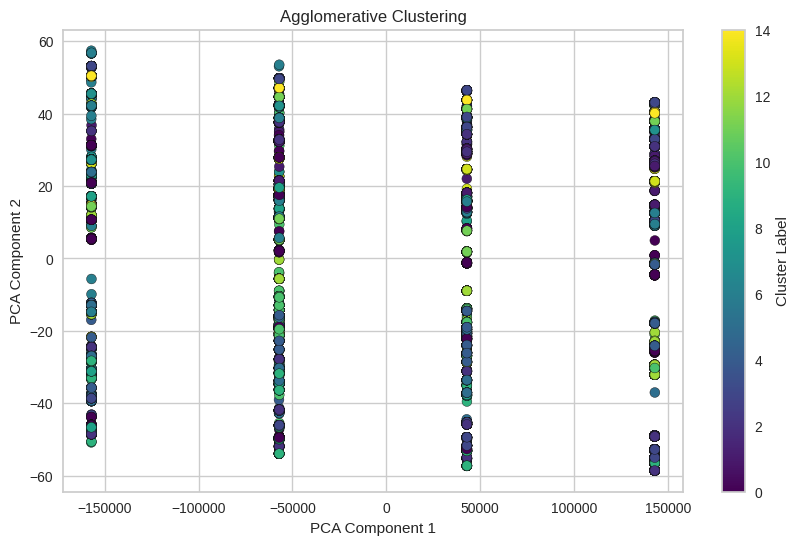

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_cleaned['cluster_agglo'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

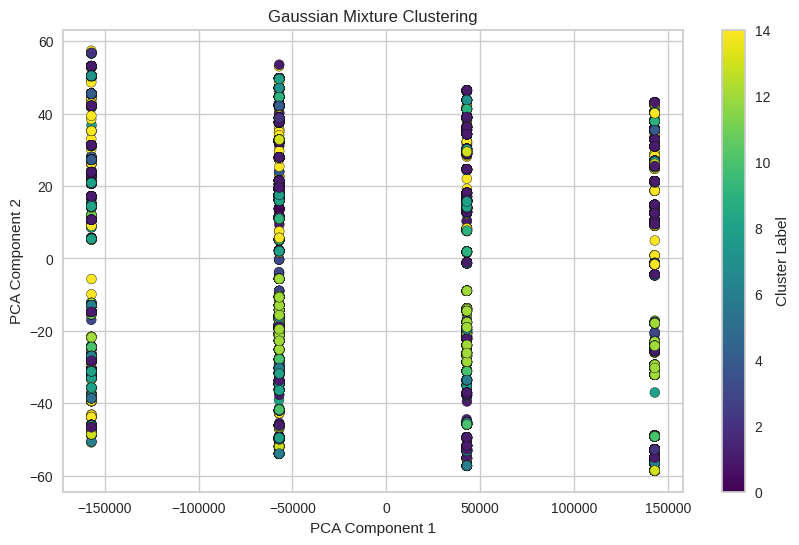

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_cleaned['cluster_gmm'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Gaussian Mixture Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

In [92]:
metrics = {
    "K-Means": {
        "Silhouette Score": silhouette_score(features, data_cleaned['cluster_kmeans']),
        "Calinski Harabasz Score": calinski_harabasz_score(features, data_cleaned['cluster_kmeans']),
        "Davies Bouldin Score": davies_bouldin_score(features, data_cleaned['cluster_kmeans'])
    },
    "DBSCAN": {}
}

if len(dbscan_labels) > 1:
    metrics["DBSCAN"] = {
        "Silhouette Score": silhouette_score(features, data_cleaned['cluster_dbscan']),
        "Calinski Harabasz Score": calinski_harabasz_score(features, data_cleaned['cluster_dbscan']),
        "Davies Bouldin Score": davies_bouldin_score(features, data_cleaned['cluster_dbscan'])
    }
else:
    metrics["DBSCAN"] = {
        "Silhouette Score": "Not applicable (only one cluster)",
        "Calinski Harabasz Score": "Not applicable (only one cluster)",
        "Davies Bouldin Score": "Not applicable (only one cluster)"
    }

metrics["Agglomerative Clustering"] = {
    "Silhouette Score": silhouette_score(features, data_cleaned['cluster_agglo']),
    "Calinski Harabasz Score": calinski_harabasz_score(features, data_cleaned['cluster_agglo']),
    "Davies Bouldin Score": davies_bouldin_score(features, data_cleaned['cluster_agglo'])
}

metrics["Gaussian Mixture"] = {
    "Silhouette Score": silhouette_score(features, data_cleaned['cluster_gmm']),
    "Calinski Harabasz Score": calinski_harabasz_score(features, data_cleaned['cluster_gmm']),
    "Davies Bouldin Score": davies_bouldin_score(features, data_cleaned['cluster_gmm'])
}

for model, scores in metrics.items():
    print(f"\nEvaluation Metrics for {model}:")
    for metric_name, score in scores.items():
        print(f"{metric_name}: {score}")



Evaluation Metrics for K-Means:
Silhouette Score: 0.5553992550513754
Calinski Harabasz Score: 47423.56106872126
Davies Bouldin Score: 0.663217238855512

Evaluation Metrics for DBSCAN:
Silhouette Score: 0.7944415559535245
Calinski Harabasz Score: 11214.188129508435
Davies Bouldin Score: 1.4690249324448996

Evaluation Metrics for Agglomerative Clustering:
Silhouette Score: 0.5878510134170922
Calinski Harabasz Score: 54045.91799519178
Davies Bouldin Score: 0.6027007621887349

Evaluation Metrics for Gaussian Mixture:
Silhouette Score: -0.1627748782822335
Calinski Harabasz Score: 2034.0397532751858
Davies Bouldin Score: 4.381278252382111


In [93]:
cluster_stats = []
for i in range(10):
    cluster_data = data_cleaned[data_cleaned['cluster'] == i]
    stats = {
        'Cluster': f'Cluster {i}',
        'Jumlah Data': len(cluster_data),
        'Rata-rata Kehadiran': cluster_data['rasio_kehadiran'].mean(),
        'Rata-rata Nilai': cluster_data['kode_nilai'].mean()
    }
    cluster_stats.append(stats)

cluster_stats_df = pd.DataFrame(cluster_stats)
cluster_stats_df.set_index('Cluster', inplace=True)
cluster_stats_df['Persentase Data'] = (cluster_stats_df['Jumlah Data'] /
                                       cluster_stats_df['Jumlah Data'].sum() * 100)
cluster_stats_df = cluster_stats_df.round(2)

print("\nKarakteristik Cluster:")
print(cluster_stats_df)


Karakteristik Cluster:
           Jumlah Data  Rata-rata Kehadiran  Rata-rata Nilai  Persentase Data
Cluster                                                                      
Cluster 0          653                 0.93             0.42             5.02
Cluster 1         1174                 0.96             0.30             9.03
Cluster 2         1442                 0.94             0.44            11.09
Cluster 3         1153                 0.70             0.40             8.86
Cluster 4          808                 0.86             0.75             6.21
Cluster 5         3044                 0.96             0.27            23.40
Cluster 6         1070                 0.91             0.30             8.23
Cluster 7          732                 0.95             0.40             5.63
Cluster 8         1699                 0.95             0.40            13.06
Cluster 9         1233                 0.94             0.26             9.48


In [94]:
print("\nRata-rata Rasio Kehadiran per Cluster:")
print(data_cleaned.groupby('cluster')['rasio_kehadiran'].mean())


Rata-rata Rasio Kehadiran per Cluster:
cluster
0     0.927040
1     0.963746
2     0.938032
3     0.698318
4     0.861386
5     0.958818
6     0.908812
7     0.945160
8     0.951316
9     0.935407
10    0.953497
11    0.799641
12    0.758659
13    0.967318
14    0.938134
Name: rasio_kehadiran, dtype: float64


In [95]:
unique_npm_per_cluster = data_cleaned.groupby('cluster')['npm_mahasiswa'].unique().reset_index()
unique_npm_per_cluster.columns = ['cluster', 'unique_npm']

print("\nUnique NPM untuk setiap cluster:")
for idx, row in unique_npm_per_cluster.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(map(str, row['unique_npm']))}")


Unique NPM untuk setiap cluster:
Cluster 0: 1931173, 1931001, 1931009, 1931083, 2031001, 2031002, 1931037, 1931047, 1931055, 1931117, 1931102, 1931177, 1931151, 1931172, 1931126, 1931132, 2031005, 2031006, 2031007, 2031008, 2031009, 2031044, 2031047, 2031049, 2031050, 2031175, 2031051, 1931160, 1931073, 1931007, 1931091, 1931034, 1931038, 1931023, 1931087, 1931121, 1931188, 1931040, 1931158, 1931031, 1931008, 1931152, 1931018, 1931124, 1931125, 1931165, 1931063, 1931053, 1931016, 1931079, 1931128, 1931086, 1931020, 1931077, 1931059, 1931072, 1931146, 1931045, 1931108, 1931122, 1931056, 1931088, 1931192, 1931032, 1931026, 1931120, 1931183, 1931029, 1931044, 1931159, 1931180, 1931182, 1931190, 1931195, 1931139, 1931054, 1931095, 1931140, 1931098, 1931066, 1931006, 1931019, 1931131, 1931074, 1931036, 1931003, 1931127, 1931136, 1931099, 1931163, 1931144, 1931062, 1931175, 1931021, 1931107, 1931050, 1931052, 1931013, 1931010, 1931118, 1931027, 1931090, 1931161, 1931113, 1931150, 1931028, 1

In [96]:
for column in columns_to_encode:

    if data_cleaned[column].isnull().any():

        data_cleaned[column].fillna(0, inplace=True)

    data_cleaned[column] = data_cleaned[column].astype(int)

    data_cleaned[column] = label_encoders[column].inverse_transform(data_cleaned[column])

In [97]:
desired_categories = [
    "Animation", "Basic Programming", "Basis Data", "Computer Hardware",
    "Design", "Game Making", "Hardware", "Jaringan",
    "Logical Thinking", "Machine Learning", "Manajemen", "Marketing",
    "Mobile Development", "Movie Making", "Multimedia", "Pemograman",
    "Startup", "Website Making"
]

data_filtered = data_cleaned[data_cleaned['kategori'].isin(desired_categories)]

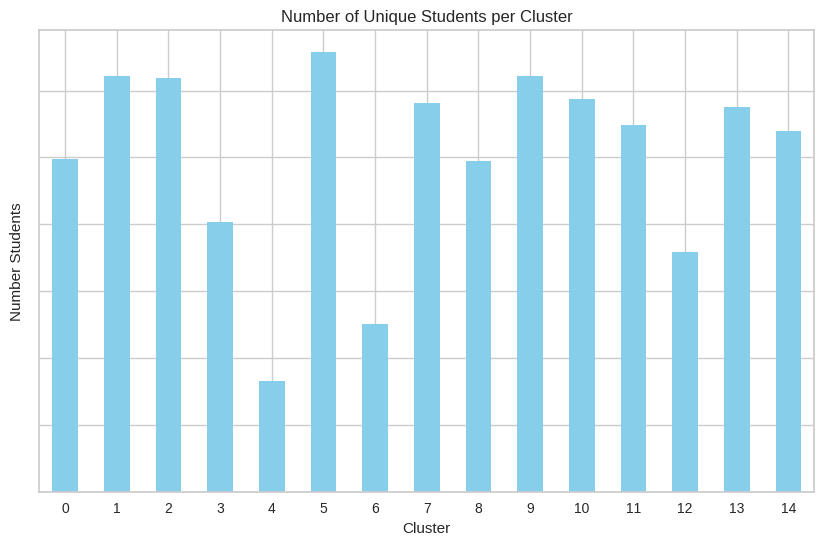

In [98]:
unique_students_per_cluster = data_filtered.groupby('cluster')['npm_mahasiswa'].nunique()

plt.figure(figsize=(10, 6))
unique_students_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Students per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number Students')

plt.gca().yaxis.set_ticklabels([])

plt.xticks(rotation=0)
plt.show()

In [99]:
print(data_filtered['npm_mahasiswa'].unique())

[1931173 1931001 1931009 1931083 2031001 2031002 2031003 1931037 1931047
 1931055 1931117 1931185 1931064 1931102 1931177 1931151 1931084 1931172
 1931126 1931132 2031005 2031006 2031007 2031008 2031009 2031044 2031046
 2031047 2031049 2031050 2031175 2031051 2031053 2031055 1931160 1931073
 1931007 1931091 1931034 1931038 1931023 1931087 1931121 1931188 1931040
 1931158 1931031 1931008 1931152 1931080 1931018 1931124 1931125 1931165
 1931063 1931053 1931016 1931079 1931128 1931143 1931149 1931086 1931020
 1931077 1931059 1931072 1931146 1931045 1931108 1931122 1931056 1931088
 1931192 1931032 1931026 1931120 1931183 1931029 1931044 1931159 1931180
 1931182 1931190 1931195 1931139 1931054 1931095 1931140 1931098 1931066
 1931006 1931019 1931131 1931074 1931036 1931003 1931127 1931136 1931099
 1931163 1931144 1931062 1931175 1931021 1931107 1931050 1931052 1931013
 1931010 1931118 1931027 1931090 1931161 1931113 1931150 1931033 1931028
 1931005 1931051 1931014 1931002 1931097 1931067 19

# Prediction function

In [101]:
def find_top_lecturers(kategori_counts_per_dosen: pd.DataFrame, categories: list, top_n: int = 5) -> None:
    # Check for required columns in the DataFrame
    for col in ['id_dosen', 'kategori', 'count']:
        if col not in kategori_counts_per_dosen.columns:
            print(f"Missing required column: {col}")
            return

    # Iterate over each category and find the top lecturers
    for category in categories:
        filtered_df = (kategori_counts_per_dosen
                       [kategori_counts_per_dosen['kategori'].str.strip().str.lower() == category.lower()])

        if filtered_df.empty:
            print(f"No entries found for category: '{category}'")
            continue

        top_lecturers = (filtered_df.groupby('id_dosen')['count']
                         .sum()
                         .reset_index()
                         .sort_values(by='count', ascending=False)
                         .head(top_n))

        print(f"\nTop {top_n} lecturers for category '{category}':")
        print(top_lecturers.to_string(index=False))

# Define the categories list
categories = [
    "Animation", "Basic Programming", "Basis Data", "Computer Hardware",
    "Design", "Game Making", "Hardware", "Jaringan",
    "Logical Thinking", "Machine Learning", "Manajemen", "Marketing",
    "Mobile Development", "Movie Making", "Multimedia", "Pemograman",
    "Startup", "Website Making"
]

# Call the function with kategori_counts_per_dosen DataFrame and categories list
find_top_lecturers(kategori_counts_per_dosen, categories)


Top 5 lecturers for category 'Animation':
 id_dosen  count
  7190034      6
  5170046      1
 11200122      1
No entries found for category: 'Basic Programming'

Top 5 lecturers for category 'Basis Data':
 id_dosen  count
  8040139      3
  9150065      1
  9180074      1
 11090111      1
No entries found for category: 'Computer Hardware'

Top 5 lecturers for category 'Design':
 id_dosen  count
 11200122     10
  1170002      6
  5120028      6
  5170046      4
  7190034      4

Top 5 lecturers for category 'Game Making':
 id_dosen  count
  1170002     14
 11200122      4
  2200046      2
  7190034      2
  5120028      1

Top 5 lecturers for category 'Hardware':
 id_dosen  count
  9060089      7
 11090111      5
  3070027      2
  9200093      1

Top 5 lecturers for category 'Jaringan':
 id_dosen  count
  3070027      4
  9200093      2
  7180066      1
  8040139      1

Top 5 lecturers for category 'Logical Thinking':
 id_dosen  count
  8040139      6
  9150065      4
  1170002     

In [102]:
def process_student_data(npm_input):

    data_filtered_student = data_filtered[data_filtered['npm_mahasiswa'] == int(npm_input)]

    if not data_filtered_student.empty:
        all_subjects = data_filtered_student[['kode_matkul', 'nama_matkul', 'kategori', 'cluster', 'kode_nilai', 'total_hadir', 'total_pertemuan']].copy()

        all_subjects['rasio_kehadiran'] = all_subjects['total_hadir'] / all_subjects['total_pertemuan']

        grade_ranking = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}
        all_subjects['grade_score'] = all_subjects['kode_nilai'].map(grade_ranking)

        average_performance_per_cluster = all_subjects.groupby('cluster').agg({
            'rasio_kehadiran': 'mean',
            'grade_score': 'mean'
        }).reset_index()

        most_suitable_cluster = average_performance_per_cluster.sort_values(by=['rasio_kehadiran', 'grade_score'], ascending=False).iloc[0]

        top_subjects = all_subjects[all_subjects['cluster'] == most_suitable_cluster['cluster']].head(3)

        if len(top_subjects) < 3:
            additional_subjects = all_subjects[all_subjects['cluster'] != most_suitable_cluster['cluster']]
            top_subjects = pd.concat([top_subjects, additional_subjects.sort_values(by=['rasio_kehadiran', 'grade_score'], ascending=False).head(3 - len(top_subjects))])

        print(f"Tiga Mata Kuliah Favorit untuk NPM {npm_input} berdasarkan cluster {most_suitable_cluster['cluster']}:")
        print(top_subjects[['kode_matkul', 'nama_matkul', 'kategori', 'kode_nilai']])

        top_categories = top_subjects['kategori'].unique()

        lecturer_data = pd.DataFrame()

        for category in top_categories:
            filtered_df = kategori_counts_per_dosen[kategori_counts_per_dosen['kategori'] == category]
            if not filtered_df.empty:
                lecturer_data = pd.concat([lecturer_data, filtered_df])

        top_lecturers = lecturer_data.groupby(['id_dosen', 'nama']).agg({'count': 'sum'}).reset_index()

        top_lecturers = top_lecturers.sort_values(by='count', ascending=False).head(5)

        print(f"\nTop 5 lecturers for NPM {npm_input} and their categories:")
        for idx, row in top_lecturers.iterrows():
            print(f"Lecturer ID: {row['id_dosen']}, Name: {row['nama']}")
    else:
        print(f"Tidak ada data mahasiswa dengan NPM {npm_input}")

while True:
    npm_input = input("Masukkan NPM Mahasiswa (atau ketik 'exit' untuk keluar): ")

    if npm_input.lower() == 'exit':
        print("Program selesai.")
        break

    process_student_data(npm_input)

Masukkan NPM Mahasiswa (atau ketik 'exit' untuk keluar): 1931001
Tiga Mata Kuliah Favorit untuk NPM 1931001 berdasarkan cluster 0.0:
    kode_matkul              nama_matkul     kategori kode_nilai
102     SI00290  Pengembangan Video Game  Game Making          A
84      SI00163           Teknologi Game  Game Making          A
85      SI00233           Desain Kreatif       Design          A

Top 5 lecturers for NPM 1931001 and their categories:
Lecturer ID: 1170002, Name: Tony Wibowo
Lecturer ID: 11200122, Name: Diny Anggriani Adnas
Lecturer ID: 5120028, Name: Deli
Lecturer ID: 7190034, Name: Jimmy Pratama
Lecturer ID: 2200046, Name: Heru Wijayanto Aripradono
Masukkan NPM Mahasiswa (atau ketik 'exit' untuk keluar): 1931111
Tiga Mata Kuliah Favorit untuk NPM 1931111 berdasarkan cluster 0.0:
     kode_matkul                      nama_matkul     kategori kode_nilai
8633     SI00290          Pengembangan Video Game  Game Making          A
8616     SI00233                   Desain Kreatif   

In [103]:
# yang sudah Lulus
#1931001 Tony Wibowo
#1931111 Diny
#1931151 Yefta Christian
#1931009 Deli
#1931007 Suwarno

#2031001 2031002 Ardiansyah (guruPSi) Mengambil DKV

#2131001 Deli 2131002 Bayu Syahputra(data publikasi sedikit) sama masih dapat berbeda sedikit

#2231029 2231028 memiliki data yang sama data
#2231030 memiliki data yang sama dengan 2 diatas namun dengan PBO Nilai B

In [104]:
dump(model, 'model.joblib')

['model.joblib']